# Input Layer

In [1]:
import pandas as pd
import numpy as np

reviews_df = pd.read_csv('singapore_airlines_reviews.csv')
reviews_df

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2


In [2]:
# Map ratings to sentiment categories
reviews_df['sentiment'] = reviews_df['rating'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))

# For simplicity in this example, we'll focus on the 'text' and 'sentiment' columns
data = reviews_df[['text', 'sentiment']]

# Preprocessing: Lowercase conversion and removing punctuation (a simple example of preprocessing)
data['text'] = data['text'].str.lower().str.replace('[^\w\s]', '', regex=True)

data['sentiment'].value_counts()


<ipython-input-2-0b0e5fb8260d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.lower().str.replace('[^\w\s]', '', regex=True)


sentiment
positive    7391
negative    1600
neutral     1009
Name: count, dtype: int64

In [3]:
print(data)

                                                   text sentiment
0     we used this airline to go from singapore to l...   neutral
1     the service on singapore airlines suites class...  positive
2     booked paid and received email confirmation fo...  negative
3     best airline in the world seats food service a...  positive
4     premium economy seating on singapore airlines ...  negative
...                                                 ...       ...
9995  first part done with singapore airlines  accep...  positive
9996  and again a great flight with singapore air gr...  positive
9997  we flew business class from frankfurt via sing...  positive
9998  as always the a380 aircraft was spotlessly pre...  positive
9999  as always singapore airlines has done it again...  positive

[10000 rows x 2 columns]


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Process module with NLTK

In [ ]:
# sentence tokenization
from nltk.tokenize import sent_tokenize

data['sentence'] = data['text'].apply(sent_tokenize)

print(data[['sentence']].head())

                                            sentence
0  [we used this airline to go from singapore to ...
1  [the service on singapore airlines suites clas...
2  [booked paid and received email confirmation f...
3  [best airline in the world seats food service ...
4  [premium economy seating on singapore airlines...


<ipython-input-6-dce104faeb69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentence'] = data['text'].apply(sent_tokenize)


In [ ]:
# word tokenization
from nltk.tokenize import word_tokenize

data['word'] = data['text'].apply(word_tokenize)

print(data)

                                                   text sentiment  \
0     we used this airline to go from singapore to l...   neutral   
1     the service on singapore airlines suites class...  positive   
2     booked paid and received email confirmation fo...  negative   
3     best airline in the world seats food service a...  positive   
4     premium economy seating on singapore airlines ...  negative   
...                                                 ...       ...   
9995  first part done with singapore airlines  accep...  positive   
9996  and again a great flight with singapore air gr...  positive   
9997  we flew business class from frankfurt via sing...  positive   
9998  as always the a380 aircraft was spotlessly pre...  positive   
9999  as always singapore airlines has done it again...  positive   

                                               sentence  \
0     [we used this airline to go from singapore to ...   
1     [the service on singapore airlines suites clas.

<ipython-input-7-4abeeb624a17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word'] = data['text'].apply(word_tokenize)


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stop words removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stop_words_from_list(words_list):
    return [word for word in words_list if word.lower() not in stop_words]

# Apply the function to each cell in the 'words' column
data['filtered_words'] = data['word'].apply(remove_stop_words_from_list)


<ipython-input-9-064539d8f519>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['filtered_words'] = data['word'].apply(remove_stop_words_from_list)


In [ ]:
print(data['filtered_words'])

0       [used, airline, go, singapore, london, heathro...
1       [service, singapore, airlines, suites, class, ...
2       [booked, paid, received, email, confirmation, ...
3       [best, airline, world, seats, food, service, b...
4       [premium, economy, seating, singapore, airline...
                              ...                        
9995    [first, part, done, singapore, airlines, accep...
9996    [great, flight, singapore, air, great, unique,...
9997    [flew, business, class, frankfurt, via, singap...
9998    [always, a380, aircraft, spotlessly, presented...
9999    [always, singapore, airlines, done, redeye, fl...
Name: filtered_words, Length: 10000, dtype: object


In [ ]:
# Stemmer
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()

def stem_words(words_list):
    return [stemmer.stem(word) for word in words_list]

# Assuming 'filtered_words' is your column with stop words removed
data['filtered_words'] = data['filtered_words'].apply(stem_words)


<ipython-input-11-44cc522bfe27>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['filtered_words'] = data['filtered_words'].apply(stem_words)


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Lemmatization
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize each word in a list of words
def lemmatize_words(words_list):
    return [lemmatizer.lemmatize(word) for word in words_list]

# Apply the function to lemmatize the words in each list
data['filtered_words'] = data['filtered_words'].apply(lemmatize_words)


<ipython-input-13-4637ecbd9e46>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['filtered_words'] = data['filtered_words'].apply(lemmatize_words)


In [ ]:
print(data)

                                                   text sentiment  \
0     we used this airline to go from singapore to l...   neutral   
1     the service on singapore airlines suites class...  positive   
2     booked paid and received email confirmation fo...  negative   
3     best airline in the world seats food service a...  positive   
4     premium economy seating on singapore airlines ...  negative   
...                                                 ...       ...   
9995  first part done with singapore airlines  accep...  positive   
9996  and again a great flight with singapore air gr...  positive   
9997  we flew business class from frankfurt via sing...  positive   
9998  as always the a380 aircraft was spotlessly pre...  positive   
9999  as always singapore airlines has done it again...  positive   

                                               sentence  \
0     [we used this airline to go from singapore to ...   
1     [the service on singapore airlines suites clas.

# Part of Speech Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk import pos_tag
from collections import Counter

data['sentence_pos_counts'] = data['filtered_words'].apply(lambda tokens: Counter(tag for word, tag in pos_tag(tokens)))

print(data['sentence_pos_counts'])

0       {'NN': 69, 'VBP': 8, 'JJ': 24, 'CD': 5, 'VB': ...
1       {'JJ': 56, 'NN': 269, 'DT': 2, 'VBP': 11, 'VBD...
2       {'NN': 29, 'VBD': 3, 'JJ': 9, 'CD': 6, 'VBN': ...
3                 {'JJS': 1, 'NN': 11, 'VBD': 1, 'JJ': 1}
4       {'JJ': 17, 'NN': 34, 'VBD': 1, 'IN': 1, 'VBP':...
                              ...                        
9995    {'JJ': 2, 'NN': 15, 'VBN': 1, 'IN': 1, 'NNS': ...
9996      {'JJ': 4, 'NN': 10, 'VB': 1, 'NNS': 1, 'IN': 1}
9997      {'JJ': 8, 'NN': 21, 'IN': 1, 'VBD': 4, 'RB': 1}
9998    {'RB': 1, 'NN': 21, 'JJ': 5, 'VBD': 1, 'CD': 1...
9999    {'RB': 6, 'JJ': 7, 'NN': 12, 'VBN': 1, 'VBP': ...
Name: sentence_pos_counts, Length: 10000, dtype: object


<ipython-input-122-3968acac01d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentence_pos_counts'] = data['filtered_words'].apply(lambda tokens: Counter(tag for word, tag in pos_tag(tokens)))


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data['filtered_words'] = data['filtered_words'].apply(' '.join)

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=10000, use_idf=True, ngram_range=(1, 3))

tfidf_matrix = vectorizer.fit_transform(data['filtered_words'])


<ipython-input-123-67596a9b6dbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['filtered_words'] = data['filtered_words'].apply(' '.join)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# First, split the data into training plus validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(tfidf_matrix, data['sentiment'], test_size=0.2, random_state=42)

# Now split the training plus validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # This results in 60% training, 20% validation, 20% test

# Initialize a classifier (example: Random Forest)
classifier = RandomForestClassifier()

# Train the classifier on the training set
classifier.fit(X_train, y_train)

# Optionally evaluate on the validation set
val_predictions = classifier.predict(X_val)

# Make predictions on the test set
test_predictions = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 0.8105
              precision    recall  f1-score   support

    negative       0.78      0.55      0.64       316
     neutral       1.00      0.00      0.01       211
    positive       0.81      0.98      0.89      1473

    accuracy                           0.81      2000
   macro avg       0.87      0.51      0.51      2000
weighted avg       0.83      0.81      0.76      2000



# SVM model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Sample text data and labels
texts = data['filtered_words']  # Assuming 'text' contains the cleaned, raw text documents
labels = data['sentiment']  # Assuming 'sentiment' is the target variable

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=10000, use_idf=True)

# Apply TF-IDF to the text data
X = vectorizer.fit_transform(texts)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
# Initialize the Support Vector Classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8445
              precision    recall  f1-score   support

    negative       0.70      0.71      0.71       316
     neutral       0.48      0.24      0.32       211
    positive       0.90      0.96      0.93      1473

    accuracy                           0.84      2000
   macro avg       0.69      0.64      0.65      2000
weighted avg       0.82      0.84      0.83      2000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter range
param_grid = {
    'C': [0.1, 1, 10],  # Note: Adjust these values based on your specific needs
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Fitting the model for grid search
grid.fit(X_train, y_train)

# Print best parameter after tuning
print(grid.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

best_svm = grid.best_estimator_
final_predictions = best_svm.predict(X_test)
print("Final model accuracy: {:.2f}".format(accuracy_score(y_test, final_predictions)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.796 total time=  12.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.792 total time=  12.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.791 total time=  12.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.798 total time=  12.9s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.791 total time=  13.4s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.743 total time=  17.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=  17.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=  17.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=  16.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.743 total time=  17.5s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.796 total time=  13.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;

In [ ]:
# This mapping assumes the model outputs string labels directly
sentiment_mapping = {'negative': 'negative', 'neutral': 'neutral', 'positive': 'positive'}


In [ ]:
def classify_review_svm(review, vectorizer, model):
    # Vectorize the review using the trained TF-IDF vectorizer
    review_vector = vectorizer.transform([review])

    # Predict the sentiment using the trained SVM model
    sentiment = model.predict(review_vector)

    # Check the type of output from the model and prepare mapping accordingly
    if isinstance(sentiment[0], str):
        sentiment_mapping = {'negative': 'negative', 'neutral': 'neutral', 'positive': 'positive'}
    else:
        sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

    # Return the mapped sentiment text
    return sentiment_mapping[sentiment[0]]

# Example usage
new_review = "The flight was delayed, but the staff were incredibly helpful."
svm_sentiment = classify_review_svm(new_review, vectorizer, svm_classifier)
print("SVM Model Sentiment:", svm_sentiment)


SVM Model Sentiment: positive


# BERT

In [17]:
import pandas as pd
from transformers import BertTokenizer
import tensorflow as tf

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization and encoding the dataset
def encode_reviews(data, max_length):
    input_ids = []
    attention_masks = []

    for review in data:
        encoded = tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=max_length,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return tf.concat(input_ids, axis=0), tf.concat(attention_masks, axis=0)

max_length = 128  # You can adjust this depending on the length of your reviews
X_train_ids, X_train_masks = encode_reviews(data['text'], max_length)


In [18]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(data['sentiment'])


In [19]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf

def build_model(learning_rate, optimizer_choice, hidden_layers, neurons):
    # Load BERT model with classification head
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

    # Input layers
    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_masks = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

    # BERT layer
    outputs = model.bert(input_ids, attention_mask=attention_masks)

    # Additional hidden layers
    x = outputs[1]
    for _ in range(hidden_layers):
        x = tf.keras.layers.Dense(neurons, activation='relu')(x)

    # Output layer
    classifier = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Assemble final model
    final_model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=classifier)

    # Optimizer selection
    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    # Compile the model
    final_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return final_model


In [20]:
import numpy as np

# Hyperparameters space definition
learning_rates = [0.001, 0.01]
optimizers = ['adam', 'rmsprop', 'sgd']
hidden_layers_options = [1, 3, 5]
neurons_options = [50, 500]

# Placeholder for storing results
results = []

# Grid search
for lr in learning_rates:
    for optimizer in optimizers:
        for hidden_layers in hidden_layers_options:
            for neurons in neurons_options:
                print(f"Training with lr={lr}, optimizer={optimizer}, hidden_layers={hidden_layers}, neurons={neurons}")
                model = build_model(lr, optimizer, hidden_layers, neurons)
                history = model.fit(
                    {'input_ids': X_train_ids, 'attention_mask': X_train_masks},
                    y_train,
                    validation_split=0.1,  # Using part of the training data as validation
                    batch_size=16,
                    epochs=3,
                    verbose=1
                )
                val_accuracy = np.max(history.history['val_accuracy'])
                results.append((lr, optimizer, hidden_layers, neurons, val_accuracy))

# Find the best configuration
best_config = max(results, key=lambda x: x[4])
print("Best configuration:", best_config)

Training with lr=0.001, optimizer=adam, hidden_layers=1, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 177s 195ms/step - loss: 0.8009 - accuracy: 0.7249 - val_loss: 0.5848 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 92s 164ms/step - loss: 0.7748 - accuracy: 0.7283 - val_loss: 0.6035 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 92s 164ms/step - loss: 0.7704 - accuracy: 0.7283 - val_loss: 0.6403 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=adam, hidden_layers=1, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 164s 195ms/step - loss: 0.8397 - accuracy: 0.7194 - val_loss: 0.7003 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 93s 165ms/step - loss: 0.7725 - accuracy: 0.7283 - val_loss: 0.6124 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 91s 162ms/step - loss: 0.7710 - accuracy: 0.7283 - val_loss: 0.6031 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=adam, hidden_layers=3, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 166s 195ms/step - loss: 0.7828 - accuracy: 0.7252 - val_loss: 0.6032 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 93s 165ms/step - loss: 0.7712 - accuracy: 0.7283 - val_loss: 0.6079 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 92s 163ms/step - loss: 0.7736 - accuracy: 0.7283 - val_loss: 0.6089 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=adam, hidden_layers=3, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 167s 197ms/step - loss: 0.8000 - accuracy: 0.7229 - val_loss: 0.6106 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 93s 165ms/step - loss: 0.7743 - accuracy: 0.7283 - val_loss: 0.6114 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 92s 163ms/step - loss: 0.7709 - accuracy: 0.7283 - val_loss: 0.6073 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=adam, hidden_layers=5, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 169s 198ms/step - loss: 0.7816 - accuracy: 0.7283 - val_loss: 0.6054 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 93s 166ms/step - loss: 0.7720 - accuracy: 0.7283 - val_loss: 0.5955 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 93s 165ms/step - loss: 0.7711 - accuracy: 0.7283 - val_loss: 0.6640 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=adam, hidden_layers=5, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 168s 197ms/step - loss: 0.7915 - accuracy: 0.7257 - val_loss: 0.5812 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 94s 166ms/step - loss: 0.7742 - accuracy: 0.7283 - val_loss: 0.5928 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 92s 164ms/step - loss: 0.7666 - accuracy: 0.7283 - val_loss: 0.6191 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=rmsprop, hidden_layers=1, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 146s 176ms/step - loss: 0.7994 - accuracy: 0.7254 - val_loss: 0.6034 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 88s 157ms/step - loss: 0.7726 - accuracy: 0.7283 - val_loss: 0.6267 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 88s 157ms/step - loss: 0.7712 - accuracy: 0.7283 - val_loss: 0.6005 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=rmsprop, hidden_layers=1, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 145s 176ms/step - loss: 0.8970 - accuracy: 0.7000 - val_loss: 0.6649 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 157ms/step - loss: 0.8191 - accuracy: 0.7259 - val_loss: 0.5853 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 88s 156ms/step - loss: 0.7759 - accuracy: 0.7280 - val_loss: 0.6160 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=rmsprop, hidden_layers=3, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 146s 177ms/step - loss: 0.7841 - accuracy: 0.7229 - val_loss: 0.6263 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7737 - accuracy: 0.7283 - val_loss: 0.5842 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 88s 157ms/step - loss: 0.7714 - accuracy: 0.7283 - val_loss: 0.5830 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=rmsprop, hidden_layers=3, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 147s 177ms/step - loss: 0.8246 - accuracy: 0.7236 - val_loss: 0.7285 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7780 - accuracy: 0.7283 - val_loss: 0.5948 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 89s 157ms/step - loss: 0.7710 - accuracy: 0.7283 - val_loss: 0.6262 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=rmsprop, hidden_layers=5, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 147s 178ms/step - loss: 0.7801 - accuracy: 0.7261 - val_loss: 0.6121 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7713 - accuracy: 0.7283 - val_loss: 0.5819 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7725 - accuracy: 0.7283 - val_loss: 0.6096 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=rmsprop, hidden_layers=5, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 148s 179ms/step - loss: 0.7967 - accuracy: 0.7266 - val_loss: 0.6047 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7718 - accuracy: 0.7283 - val_loss: 0.6066 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 89s 157ms/step - loss: 0.7678 - accuracy: 0.7283 - val_loss: 0.6258 - val_accuracy: 0.8360
Training with lr=0.001, optimizer=sgd, hidden_layers=1, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 142s 175ms/step - loss: 0.5399 - accuracy: 0.7950 - val_loss: 0.3683 - val_accuracy: 0.8520
Epoch 2/3
563/563 [==============================] - 88s 157ms/step - loss: 0.3699 - accuracy: 0.8537 - val_loss: 0.3821 - val_accuracy: 0.8480
Epoch 3/3
563/563 [==============================] - 88s 157ms/step - loss: 0.3374 - accuracy: 0.8659 - val_loss: 0.3002 - val_accuracy: 0.8920
Training with lr=0.001, optimizer=sgd, hidden_layers=1, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 141s 180ms/step - loss: 0.4968 - accuracy: 0.8079 - val_loss: 0.3116 - val_accuracy: 0.8740
Epoch 2/3
563/563 [==============================] - 88s 156ms/step - loss: 0.3618 - accuracy: 0.8586 - val_loss: 0.3113 - val_accuracy: 0.8860
Epoch 3/3
563/563 [==============================] - 88s 156ms/step - loss: 0.3329 - accuracy: 0.8696 - val_loss: 0.2956 - val_accuracy: 0.8840
Training with lr=0.001, optimizer=sgd, hidden_layers=3, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 141s 179ms/step - loss: 0.5967 - accuracy: 0.7767 - val_loss: 0.3694 - val_accuracy: 0.8430
Epoch 2/3
563/563 [==============================] - 88s 157ms/step - loss: 0.3968 - accuracy: 0.8452 - val_loss: 0.3310 - val_accuracy: 0.8440
Epoch 3/3
563/563 [==============================] - 88s 157ms/step - loss: 0.3530 - accuracy: 0.8600 - val_loss: 0.3030 - val_accuracy: 0.8700
Training with lr=0.001, optimizer=sgd, hidden_layers=3, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 141s 175ms/step - loss: 0.5705 - accuracy: 0.7844 - val_loss: 0.3347 - val_accuracy: 0.8580
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.3799 - accuracy: 0.8507 - val_loss: 0.3293 - val_accuracy: 0.8840
Epoch 3/3
563/563 [==============================] - 89s 158ms/step - loss: 0.3410 - accuracy: 0.8667 - val_loss: 0.3208 - val_accuracy: 0.8730
Training with lr=0.001, optimizer=sgd, hidden_layers=5, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 147s 183ms/step - loss: 0.7035 - accuracy: 0.7468 - val_loss: 0.4009 - val_accuracy: 0.8180
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.4342 - accuracy: 0.8378 - val_loss: 0.3263 - val_accuracy: 0.8660
Epoch 3/3
563/563 [==============================] - 89s 158ms/step - loss: 0.3807 - accuracy: 0.8523 - val_loss: 0.3380 - val_accuracy: 0.8530
Training with lr=0.001, optimizer=sgd, hidden_layers=5, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 143s 180ms/step - loss: 0.6640 - accuracy: 0.7363 - val_loss: 0.4154 - val_accuracy: 0.8020
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.4161 - accuracy: 0.8419 - val_loss: 0.3250 - val_accuracy: 0.8680
Epoch 3/3
563/563 [==============================] - 89s 158ms/step - loss: 0.3677 - accuracy: 0.8547 - val_loss: 0.3041 - val_accuracy: 0.8760
Training with lr=0.01, optimizer=adam, hidden_layers=1, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 171s 199ms/step - loss: 0.9233 - accuracy: 0.7050 - val_loss: 0.6008 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 94s 166ms/step - loss: 0.7769 - accuracy: 0.7283 - val_loss: 0.6361 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 92s 164ms/step - loss: 0.7680 - accuracy: 0.7283 - val_loss: 0.6089 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=adam, hidden_layers=1, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 170s 199ms/step - loss: 0.9124 - accuracy: 0.7220 - val_loss: 0.6394 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 93s 166ms/step - loss: 0.7671 - accuracy: 0.7283 - val_loss: 0.6021 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 92s 164ms/step - loss: 0.7650 - accuracy: 0.7283 - val_loss: 0.5942 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=adam, hidden_layers=3, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 173s 200ms/step - loss: 0.8025 - accuracy: 0.7247 - val_loss: 0.6161 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 94s 166ms/step - loss: 0.7667 - accuracy: 0.7283 - val_loss: 0.6021 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 92s 164ms/step - loss: 0.7666 - accuracy: 0.7283 - val_loss: 0.6141 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=adam, hidden_layers=3, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 169s 199ms/step - loss: 1.0001 - accuracy: 0.7233 - val_loss: 0.5940 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 94s 166ms/step - loss: 0.7676 - accuracy: 0.7283 - val_loss: 0.6273 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 92s 164ms/step - loss: 0.7667 - accuracy: 0.7283 - val_loss: 0.6105 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=adam, hidden_layers=5, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 171s 199ms/step - loss: 0.7832 - accuracy: 0.7272 - val_loss: 0.6017 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 94s 166ms/step - loss: 0.7679 - accuracy: 0.7283 - val_loss: 0.6031 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 93s 165ms/step - loss: 0.7672 - accuracy: 0.7283 - val_loss: 0.6052 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=adam, hidden_layers=5, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 171s 199ms/step - loss: 1.0043 - accuracy: 0.7182 - val_loss: 0.6045 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 94s 167ms/step - loss: 0.7666 - accuracy: 0.7283 - val_loss: 0.5974 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 92s 164ms/step - loss: 0.7673 - accuracy: 0.7283 - val_loss: 0.6023 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=rmsprop, hidden_layers=1, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 150s 179ms/step - loss: 0.9417 - accuracy: 0.7203 - val_loss: 0.5965 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7654 - accuracy: 0.7283 - val_loss: 0.5905 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 89s 157ms/step - loss: 0.7650 - accuracy: 0.7283 - val_loss: 0.6011 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=rmsprop, hidden_layers=1, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 149s 180ms/step - loss: 1.0489 - accuracy: 0.7251 - val_loss: 0.5936 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7655 - accuracy: 0.7283 - val_loss: 0.6035 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 88s 156ms/step - loss: 0.7654 - accuracy: 0.7283 - val_loss: 0.6167 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=rmsprop, hidden_layers=3, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 152s 178ms/step - loss: 0.8413 - accuracy: 0.7263 - val_loss: 0.6173 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7676 - accuracy: 0.7283 - val_loss: 0.6244 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 88s 157ms/step - loss: 0.7672 - accuracy: 0.7283 - val_loss: 0.5994 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=rmsprop, hidden_layers=3, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 149s 185ms/step - loss: 3.1098 - accuracy: 0.7227 - val_loss: 0.5924 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7687 - accuracy: 0.7283 - val_loss: 0.6013 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 89s 157ms/step - loss: 0.7678 - accuracy: 0.7283 - val_loss: 0.6026 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=rmsprop, hidden_layers=5, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 151s 182ms/step - loss: 0.8098 - accuracy: 0.7249 - val_loss: 0.6113 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 90s 159ms/step - loss: 0.7676 - accuracy: 0.7283 - val_loss: 0.6028 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 89s 159ms/step - loss: 0.7678 - accuracy: 0.7283 - val_loss: 0.5916 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=rmsprop, hidden_layers=5, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 154s 183ms/step - loss: 9.8412 - accuracy: 0.7186 - val_loss: 0.6090 - val_accuracy: 0.8360
Epoch 2/3
563/563 [==============================] - 89s 159ms/step - loss: 0.7693 - accuracy: 0.7283 - val_loss: 0.5992 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 89s 159ms/step - loss: 0.7676 - accuracy: 0.7283 - val_loss: 0.5923 - val_accuracy: 0.8360
Training with lr=0.01, optimizer=sgd, hidden_layers=1, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 146s 186ms/step - loss: 0.4172 - accuracy: 0.8338 - val_loss: 0.3147 - val_accuracy: 0.8790
Epoch 2/3
563/563 [==============================] - 89s 157ms/step - loss: 0.3155 - accuracy: 0.8743 - val_loss: 0.3000 - val_accuracy: 0.8920
Epoch 3/3
563/563 [==============================] - 89s 157ms/step - loss: 0.2770 - accuracy: 0.8923 - val_loss: 0.3083 - val_accuracy: 0.8800
Training with lr=0.01, optimizer=sgd, hidden_layers=1, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 139s 173ms/step - loss: 0.4373 - accuracy: 0.8319 - val_loss: 0.2870 - val_accuracy: 0.8830
Epoch 2/3
563/563 [==============================] - 88s 157ms/step - loss: 0.3118 - accuracy: 0.8772 - val_loss: 0.2913 - val_accuracy: 0.8850
Epoch 3/3
563/563 [==============================] - 88s 157ms/step - loss: 0.2682 - accuracy: 0.8927 - val_loss: 1.0483 - val_accuracy: 0.6940
Training with lr=0.01, optimizer=sgd, hidden_layers=3, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 149s 182ms/step - loss: 0.5190 - accuracy: 0.8039 - val_loss: 0.3065 - val_accuracy: 0.8750
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.3440 - accuracy: 0.8607 - val_loss: 0.3028 - val_accuracy: 0.8730
Epoch 3/3
563/563 [==============================] - 89s 157ms/step - loss: 0.2945 - accuracy: 0.8849 - val_loss: 0.2998 - val_accuracy: 0.8880
Training with lr=0.01, optimizer=sgd, hidden_layers=3, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 140s 178ms/step - loss: 0.4752 - accuracy: 0.8136 - val_loss: 0.3016 - val_accuracy: 0.8810
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.3485 - accuracy: 0.8616 - val_loss: 0.3099 - val_accuracy: 0.8800
Epoch 3/3
563/563 [==============================] - 89s 158ms/step - loss: 0.2908 - accuracy: 0.8860 - val_loss: 0.3016 - val_accuracy: 0.8740
Training with lr=0.01, optimizer=sgd, hidden_layers=5, neurons=50


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 147s 185ms/step - loss: 0.4648 - accuracy: 0.8217 - val_loss: 0.6841 - val_accuracy: 0.7380
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.3487 - accuracy: 0.8607 - val_loss: 0.3365 - val_accuracy: 0.8720
Epoch 3/3
563/563 [==============================] - 89s 158ms/step - loss: 0.2959 - accuracy: 0.8818 - val_loss: 0.3322 - val_accuracy: 0.8630
Training with lr=0.01, optimizer=sgd, hidden_layers=5, neurons=500


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
563/563 [==============================] - 142s 174ms/step - loss: 0.4518 - accuracy: 0.8236 - val_loss: 0.3064 - val_accuracy: 0.8780
Epoch 2/3
563/563 [==============================] - 89s 158ms/step - loss: 0.4463 - accuracy: 0.8339 - val_loss: 0.6245 - val_accuracy: 0.8360
Epoch 3/3
563/563 [==============================] - 89s 158ms/step - loss: 0.7716 - accuracy: 0.7283 - val_loss: 0.5807 - val_accuracy: 0.8360
Best configuration: (0.001, 'sgd', 1, 50, 0.8920000195503235)


In [29]:
# Build the model with the best configuration
best_lr = 0.001
best_optimizer = 'sgd'
best_hidden_layers = 1
best_neurons = 50

model = build_model(best_lr, best_optimizer, best_hidden_layers, best_neurons)

# Train the model
history = model.fit(
    {'input_ids': X_train_ids, 'attention_mask': X_train_masks},
    y_train,
    validation_split=0.1,  # Using part of the training data as validation
    batch_size=16,
    epochs=10,  # More epochs for better training
    verbose=1
)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
563/563 [==============================] - 140s 173ms/step - loss: 0.5135 - accuracy: 0.8038 - val_loss: 0.3808 - val_accuracy: 0.8330
Epoch 2/10
563/563 [==============================] - 88s 157ms/step - loss: 0.3656 - accuracy: 0.8560 - val_loss: 0.3173 - val_accuracy: 0.8740
Epoch 3/10
563/563 [==============================] - 88s 156ms/step - loss: 0.3320 - accuracy: 0.8684 - val_loss: 0.3155 - val_accuracy: 0.8730
Epoch 4/10
563/563 [==============================] - 88s 157ms/step - loss: 0.3123 - accuracy: 0.8751 - val_loss: 0.3012 - val_accuracy: 0.8800
Epoch 5/10
563/563 [==============================] - 88s 157ms/step - loss: 0.3010 - accuracy: 0.8810 - val_loss: 0.3002 - val_accuracy: 0.8770
Epoch 6/10
563/563 [==============================] - 88s 157ms/step - loss: 0.2812 - accuracy: 0.8878 - val_loss: 0.3635 - val_accuracy: 0.8500
Epoch 7/10
563/563 [==============================] - 88s 157ms/step - loss: 0.2741 - accuracy: 0.8926 - val_loss: 0.3189 - val_a

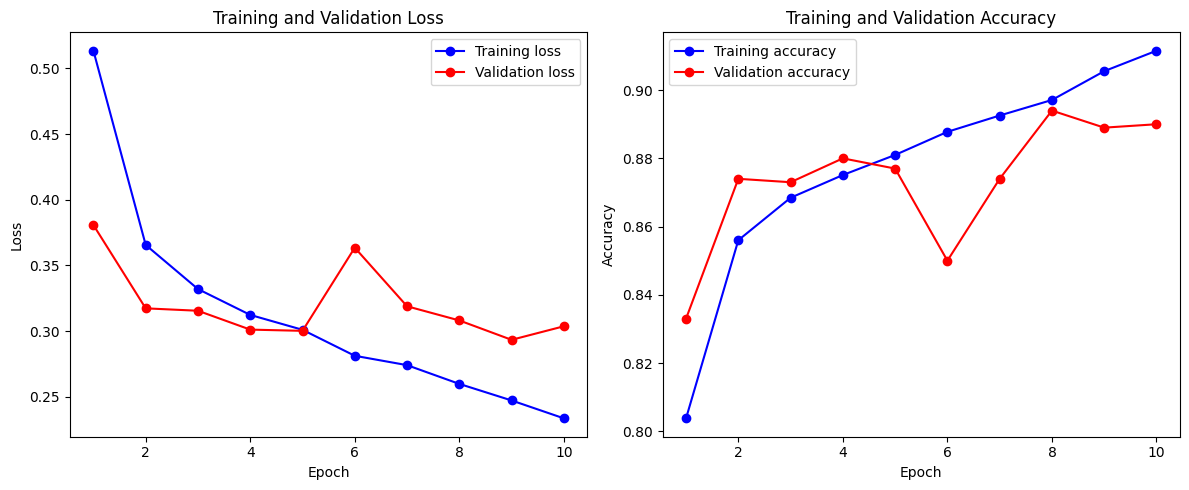

In [30]:
import matplotlib.pyplot as plt

# Function to plot loss and accuracy
def plot_loss_accuracy(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plotting the graphs for the trained model
plot_loss_accuracy(history)


In [80]:
def predict_sentiment(sentence, model, tokenizer, label_encoder):
    # Preprocess the sentence
    encoded = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=128,  # Ensure this matches the training setup
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='tf'
    )

    # Extract input_ids and attention_mask from encoded dictionary
    input_ids = encoded['input_ids']
    attention_mask = encoded['attention_mask']

    # Make a prediction
    logits = model.predict({'input_ids': input_ids, 'attention_mask': attention_mask})[0]

    # Convert logits to softmax to derive probabilities
    probabilities = tf.nn.softmax(logits, axis=-1)

    # Get the class with the highest probability
    predicted_class_id = tf.argmax(probabilities, axis=-1)

    # Decode class ID to label
    predicted_class = label_encoder.inverse_transform([predicted_class_id.numpy()])[0]

    return predicted_class, probabilities.numpy()

def display_class_probabilities(probabilities, label_encoder):
    # Display the class probabilities as percentages
    print("Class probabilities:")
    for idx, prob in enumerate(probabilities.flatten(), 1):
        label = label_encoder.inverse_transform([idx - 1])[0]
        print(f"{label}: {prob * 100:.2f}%")


In [83]:
# Example usage
test_sentence = "The airline is the best I have ever seen."

# Predict sentiment and get probabilities
predicted_sentiment, probabilities = predict_sentiment(test_sentence, model, tokenizer, label_encoder)
print(f"Predicted sentiment: {predicted_sentiment}")
display_class_probabilities(probabilities, label_encoder)


1/1 [==============================] - 0s 46ms/step
Predicted sentiment: positive
Class probabilities:
negative: 21.23%
neutral: 21.26%
positive: 57.51%
